In [6]:
pwd()
using Pkg; Pkg.activate("../../FermiCG/")

using FermiCG
using PyCall
using Plots
using LinearAlgebra
using Printf

  Activating environment at `~/code/FermiCG/Project.toml`


This structure is optimized using pyberny in pyscf with b3lyp/sto3g

In [8]:
molecule = "
C         -0.89956       -0.38362       -0.22386
C         -1.16720       -1.76874       -0.35795
C         -0.15422       -2.73734       -0.14911
C          1.14535       -2.29811        0.20620
C          1.44092       -0.92048        0.35758
C          0.40862        0.02461        0.13638
C         -1.98863        0.64283       -0.46885
H         -2.16949       -2.09597       -0.66132
C         -0.45438       -4.21595       -0.30204
H          1.92911       -3.04092        0.40029
C          2.83143       -0.46705        0.75829
H          0.62625        1.09413        0.24690
C         -1.68095        1.89615       -1.05412
C         -2.68774        2.86514       -1.29120
C         -4.02226        2.56268       -0.92268
C         -4.36051        1.31924       -0.33325
C         -3.33316        0.36733       -0.11644
H         -0.64862        2.10743       -1.35972
C         -2.34629        4.19393       -1.93481
H         -4.80997        3.30590       -1.09788
C         -5.79143        1.01688        0.06355
H         -3.57816       -0.58814        0.36389
C          3.00978        0.66901        1.58629
C          4.30255        1.10270        1.97296
C          5.42927        0.38015        1.50734
C          5.28316       -0.75821        0.67613
C          3.97720       -1.17208        0.31324
C          0.52404       -5.10073       -0.81902
C          0.26500       -6.48734       -0.95515
C         -1.00122       -6.98441       -0.55755
C         -2.00165       -6.12384       -0.04081
C         -1.71423       -4.74106        0.07850
H          2.12850        1.20325        1.96262
C          4.47629        2.30817        2.87479
H          6.43536        0.70795        1.79703
C          6.49958       -1.51331        0.17945
H          3.85257       -2.03615       -0.35120
H          1.50159       -4.70420       -1.12016
C          1.31788       -7.41824       -1.52194
H         -1.22292       -8.05159       -0.68261
C         -3.35124       -6.67185        0.37696
H         -2.46977       -4.06961        0.50514
C         -3.26722        4.84269       -2.79914
C         -2.94896        6.07568       -3.39766
C         -1.70556        6.68825       -3.14322
C         -0.78147        6.05734       -2.28641
C         -1.09711        4.82275       -1.68979
C         -6.64809        2.04358        0.54092
C         -7.97666        1.76130        0.90850
C         -8.47852        0.44860        0.80361
C         -7.64070       -0.58090        0.33004
C         -6.31091       -0.30078       -0.03445
H         -4.23316        4.36807       -3.01627
H         -3.67250        6.55829       -4.06885
H         -1.45807        7.65122       -3.60996
H          0.18803        6.53067       -2.07921
H         -0.37449        4.34717       -1.01384
H         -6.26385        3.06737        0.63969
H         -8.62177        2.56827        1.28205
H         -9.51612        0.22916        1.08936
H         -8.02618       -1.60570        0.24042
H         -5.67145       -1.10774       -0.41546
C          7.70938       -0.83194       -0.11718
C          8.83802       -1.53430       -0.57844
C          8.78310       -2.93206       -0.74972
C          7.58978       -3.62264       -0.45785
C          6.45924       -2.92115       -0.00002
C          3.58123        3.40799        2.80208
C          3.74371        4.52727        3.63909
C          4.80198        4.57052        4.56875
C          5.69773        3.48589        4.65406
C          5.53823        2.36730        3.81550
H          7.75955        0.25865       -0.00051
H          9.76292       -0.98811       -0.80894
H          9.66496       -3.47986       -1.10842
H          7.54045       -4.71291       -0.58350
H          5.53945       -3.47154        0.23761
H          2.76077        3.39157        2.07283
H          3.04388        5.37069        3.56307
H          4.92755        5.44381        5.22296
H          6.52188        3.50927        5.38009
H          6.23370        1.52207        3.90133
C          1.43141       -8.75609       -1.06020
C          2.21681       -6.97572       -2.52796
C          3.19311       -7.84157       -3.05427
C          3.29445       -9.16635       -2.58445
C          2.41033       -9.61977       -1.58504
C         -4.53274       -5.90142        0.21469
C         -5.78554       -6.41138        0.60219
C         -5.88441       -7.70047        1.16296
C         -4.72046       -8.47690        1.33175
C         -3.46748       -7.96941        0.94158
H          0.75706       -9.11626       -0.27224
H          2.13796       -5.95017       -2.91210
H          3.87477       -7.48224       -3.83731
H          4.05747       -9.84143       -2.99492
H          2.48616      -10.64953       -1.20989
H         -4.46958       -4.90148       -0.23405
H         -6.68895       -5.80220        0.46229
H         -6.86244       -8.09755        1.46656
H         -4.78841       -9.48069        1.77300
H         -2.56591       -8.57789        1.09076           
"

atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

basis = "sto-3g"

# Create FermiCG.Molecule type
mol = Molecule(0,1,atoms,basis)

#Run SCF calculation in pyscf
pyscf = pyimport("pyscf")
pymol = pyscf.gto.Mole(atom=molecule, spin=0, charge=0, basis=basis)
pymol.build()
mf = pyscf.scf.RHF(pymol).run()
C = mf.mo_coeff
#Write molden files of hf and localized orbitals
FermiCG.pyscf_write_molden(mol, C, filename="hf_canonical_pah60_sto3g.molden")

nbas = size(C)[1]
nalpha = (6*60 + 42) ÷ 2
nbeta = (6*60 + 42) ÷ 2
@printf(" Number of electrons: %12.8f %12.8f \n", nalpha, nbeta)
@printf(" Total electrons: %12.8f \n", nalpha+nbeta)
@printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)

converged SCF energy = -2268.65416149264
 Number of electrons: 201.00000000 201.00000000 
 Total electrons: 402.00000000 
 Hartree-Fock Energy: -2268.65416149

Now the π and σ spaces must be separated. Currently this has to be done by hand, but would like to automate this process at some point. Separation is needed for accuracy localization.

In [9]:
#Get active space

#act_space for 631g*
#act_space = [154, 157, 158, collect(163:166)..., 173, 174, 179, collect(182:201)..., collect(202:221)..., collect(267:271)..., collect(344:348)...] #pi space should be size 6*number of benzene rings (clusters) so 60 orbs

#active space for sto3g
act_space = [152, 153, 154, 156, collect(161:164)..., 168, 175, collect(182:201)..., collect(202:231)...]
println(size(act_space))

n_frozen = 171 #Total elecs - n_active_elecs ÷ 2
nbas = size(C)[1]
inactive_space = setdiff(1:nbas,act_space)
occ_space = inactive_space[1:n_frozen]
vir_space = inactive_space[n_frozen+1:end]

Cact = C[:,act_space]
Cocc = C[:,occ_space]
Cvir = C[:,vir_space]

n_core = 60
core_space = inactive_space[1:n_core]
println(size(core_space))
sig_space = inactive_space[n_core+1:end]
Csig = C[:,sig_space]

# Number of active electrons 
ne = 60
na = 30
nb = 30

(60,)
(60,)


30

In [11]:
#Pick out Pi and Sigma space to localize
nbas = size(C)[1]
occ = [1:201;]
vir = [202:nbas;]
print(size(vir))

#Localize orbitials using pyscf
lo = pyimport("pyscf.lo")
Cact = lo.PM(pymol, Cact).kernel()
Csig = lo.PM(pymol, Csig).kernel()

FermiCG.pyscf_write_molden(mol, Cact, filename="active_pm_localized.molden")
FermiCG.pyscf_write_molden(mol, Csig, filename="sig_localized.molden")

(141,)

1

In [20]:
#This jld2 file can be used to gain access to the MO coeff info without having to run the scf calculation again

#using JLD2
#@save "mo_coeff_info.jld2" C Cact Csig mol

using JLD2
@load "mo_coeff_info.jld2"

4-element Vector{Symbol}:
 :C
 :Cact
 :Csig
 :mol

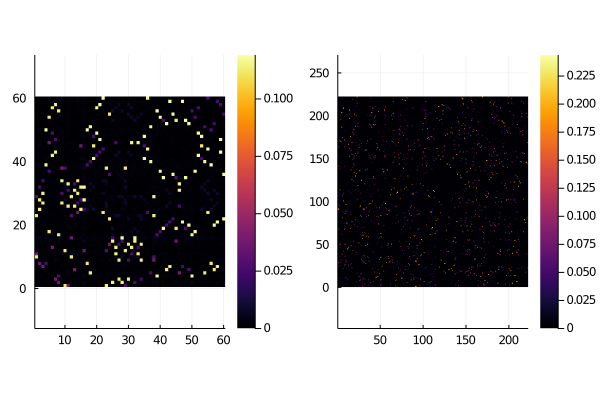

In [21]:
# Using these orbitals, let's semi-algorithmically cluster the system. 
# We'll start by separately looking at the π and σ spaces
# Using these orbital orderings, we can inspect to see how local the exchange matrix is
tot_na = (6*60 + 42) ÷ 2
h,j,k = FermiCG.pyscf_get_jk(mol, C[:,1:tot_na] * C[:,1:tot_na]');

k1 = Cact'*(k)*Cact
k2 = Csig'*(k)*Csig
k1 = k1 - Diagonal(diag(k1))
k2 = k2 - Diagonal(diag(k2))
p1 = heatmap(abs.(k1), aspect_ratio=:equal)
p2 = heatmap(abs.(k2), aspect_ratio=:equal)
plot(p1, p2, layout = @layout [a  b])

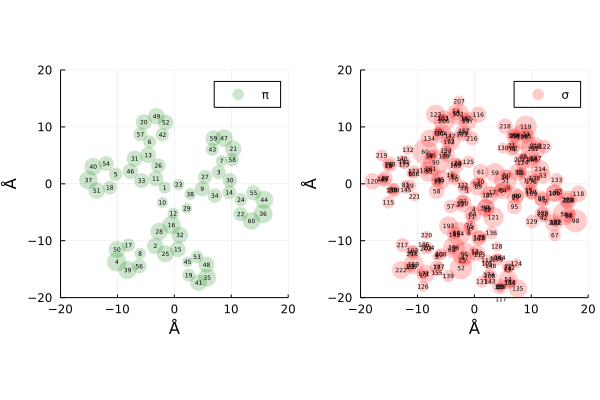

In [21]:
# 
# We can also inspect the orbital positions by looking at <r> and <r⋅r>
pymol = FermiCG.make_pyscf_mole(mol);
r1 = pymol.intor_symmetric("int1e_r");
r2 = pymol.intor_symmetric("int1e_r2");
rx_act = Cact'*r1[1,:,:]*Cact;
ry_act = Cact'*r1[2,:,:]*Cact;
rz_act = Cact'*r1[3,:,:]*Cact;
rx_sig = Csig'*r1[1,:,:]*Csig;
ry_sig = Csig'*r1[2,:,:]*Csig;
rz_sig = Csig'*r1[3,:,:]*Csig;
r2_act = Cact'*r2*Cact;
r2_sig = Csig'*r2*Csig;

var_act = diag(r2_act) - diag(rx_act).*diag(rx_act)- diag(ry_act).*diag(ry_act)- diag(rz_act).*diag(rz_act)
var_sig = diag(r2_sig) - diag(rx_sig).*diag(rx_sig)- diag(ry_sig).*diag(ry_sig)- diag(rz_sig).*diag(rz_sig)


p1 = scatter(diag(rx_act), diag(ry_act), aspect_ratio=:equal, 
    markersize=2*sqrt.(var_act), 
    labels="π",xlims=(-20,20),ylims=(-20,20),  legendfont = font(8),    
    markeralpha = 0.2,
    markercolor = :green,
    markerstrokewidth = 0,
)

[annotate!(rx_act[i,i],ry_act[i,i],i, font(4)) for i in 1:size(rx_act,1)]

p2 = scatter(diag(rx_sig), diag(ry_sig), aspect_ratio=:equal, 
    markersize=3*sqrt.(var_sig), 
    labels="σ",xlims=(-20,20),ylims=(-20,20),     
    markeralpha = 0.2,
    markercolor = :red,
    markerstrokewidth = 0,
)
[annotate!(rx_sig[i,i],ry_sig[i,i],i, font(4)) for i in 1:size(rx_sig,1)]

# p3 = scatter([diag(rx_act), diag(rx_sig)], [diag(ry_act), diag(ry_sig)], aspect_ratio=:equal, 
#     markersize=5*sqrt.([var_act..., var_sig...]), 
#     labels="σ",xlims=(-10,10),ylims=(-10,10),     
#     markeralpha = 0.2,
#     markercolor = :red,
#     markerstrokewidth = 0,
# )
# [annotate!(rx_sig[i,i],ry_sig[i,i],i, font(4)) for i in 1:size(rx_sig,1)]

plot(p1, p2, layout = @layout [a  b]
)
xlabel!("Å")
ylabel!("Å")

# 
# x and y axes are in units of Å. Each point corresponds to the mean position of the orbital, and the marker size 
# is 2*log(<r⋅r>). Thus, larger dots are more diffuse.

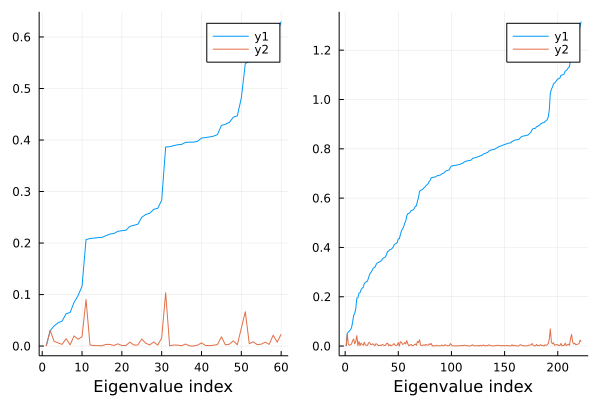

In [23]:
# From here, we could manually cluster. But we can instead try to use a k-means approach to spectral clustering. 
using Clustering
using SpectralClustering
# h,j,k = FermiCG.pyscf_get_jk(mol, C[:,1:tot_na] * C[:,1:tot_na]');


k1 = Cact'*(k)*Cact;
k2 = Csig'*(k)*Csig;

nvecs = 3
A = abs.(k1)
L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
F = eigen(L);
p1 = plot(F.values, xlabel="Eigenvalue")
p1 = plot!( [0,[F.values[i+1]-F.values[i] for i in 1:length(F.values)-1]...], xlabel="Eigenvalue index")

A_act = F.vectors[:,1:nvecs]*F.vectors[:,1:nvecs]'
clustering_act = clusterize(KMeansClusterizer(nvecs), A_act).assignments;
perm_act = sortperm(clustering_act)
p2 = heatmap(A_act, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital")
A_act = A_act[perm_act, perm_act]
p3 = heatmap(A_act, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital")

Cact_sorted = Cact[:,perm_act]

nvecs = 3
A = abs.(k2)
L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
F = eigen(L);
p4 = plot( F.values, xlabel="Eigenvalue index")
p4 = plot!( [0,[F.values[i+1]-F.values[i] for i in 1:length(F.values)-1]...], xlabel="Eigenvalue index")
A_sig = F.vectors[:,1:nvecs]*F.vectors[:,1:nvecs]'
p5 = heatmap(A_sig, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital")

clustering_sig = clusterize(KMeansClusterizer(nvecs), A_sig).assignments;
perm_sig = sortperm(clustering_sig)
A_sig = A_sig[perm_sig, perm_sig]
p6 = heatmap(A_sig, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital")

Csig_sorted = Csig[:,perm_sig]


FermiCG.pyscf_write_molden(mol, Cact_sorted, filename="act_sorted_pah60.molden");
FermiCG.pyscf_write_molden(mol, Csig_sorted, filename="sig_sorted_pah60.molden");
plot(p1, p4,  layout = @layout [a  b] )

At this point you can inspect the localized orbitals and just pull out the active space you want.
For this specific two dimenional benzene ring example the active space will only have the pi
space on each benzene ring. Meaning you will only have 6 pz orbitals on each benzene ring. 
There will be a total of 10 clusters each with 6 electrons (3 alpha, 3 beta) and 6 orbitals per
cluster.

In [5]:
#Make fci dump file once you have inspected the orbitals (This will help in the long run!)

#manually choose which orbitals you want in the fci dump file. Make sure they are ordered by cluster
new_mos = Array(zeros(size(C)[1],60))

#cluster MO indices
one = [188,189,206,208,213,222]
two = [167,182,185,198,202,221]
three = [159,210,211,218,226,342]
four = [190,194,209,217,225,230]
five = [154,168,186,197,201,203]
six = [160,191,205,212,224,228]
seven = [161,193,207,214,227,231]
eight = [153,184,187,196,199,204]
nine = [192,215,216,219,220,223]
ten = [152,157,175,183,195,200]

all = [one, two, three, four, five, six, seven, eight, nine, ten]

spot = 1
active = Array(zeros(342,60))
for row in 1:size(all)[1]
    for i in all[row]
        active[:,spot] = C[:,i]
        spot += 1
    end
end


#write fci dump file from the modified mo coefficients
pyscf.tools.fcidump.from_mo(pymol, "fcidump.2dexample", active)

In [4]:
#Can just read in pyscf dump file for integrals (once you have already run an scf calculation)
pyscf = pyimport("pyscf");
fcidump = pyimport("pyscf.tools.fcidump");
ctx = fcidump.read("fcidump.2dexample");
h = ctx["H1"];
g = ctx["H2"];
ecore = ctx["ECORE"];
g = pyscf.ao2mo.restore("1", g, size(h,2))

#set integrals and rotate (This might be the old way)
ints = InCoreInts(ecore,h,g)

#Possible new way from PAH18-1 example
#ints = FermiCG.pyscf_build_ints(mol, Cact_sorted, 2.0*Cocc*Cocc');
# @printf(" Ecore: %12.8f", ints.h0)


InCoreInts(6951.266225296333, [-34.73909282322337 0.01029526619336085 … -0.004300691341891483 -0.02122384866322297; 0.01029526619336085 -34.73204700930455 … 0.002144332802629156 -0.01971398647024752; … ; -0.004300691341891483 0.002144332802629156 … -37.96351453007007 1.821674266290249; -0.02122384866322297 -0.01971398647024752 … 1.821674266290249 -41.54498322954336], [0.1915478717159999 0.01280731300195191 … 0.001274736929679036 -0.0003210081922154895; 0.01280731300195191 0.1853999986147567 … 0.0003709363453709915 -9.717606593663065e-6; … ; 0.001274736929679036 0.0003709363453709915 … 0.1010284324096444 0.000169795053730853; -0.0003210081922154895 -9.717606593663065e-6 … 0.000169795053730853 0.06254246225805823]

[0.01280731300195191 0.1162660388971273 … 8.328341638455831e-5 -0.0005427237353035669; 0.1162660388971273 0.02682009490542957 … -0.0003243418908540831 -0.0004307518118139027; … ; 8.328341638455831e-5 -0.0003243418908540831 … 0.0004648433050100445 -0.006990027837813561; -0.0005

In [17]:
#Define clusters and intial Fock Spaces for the initial CMF calculation
clusters_in = [(1:6),(7:12),(13:18),(19:24),(25:30),(31:36),(37:42),(43:48),(49:54),(55:60)]
init_fspace = [(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3),(3,3)]
print(typeof(ints))
rdm1 = zeros(size(ints.h1))
na=30
nb=30

InCoreInts

30

In [19]:
#Define clusters now using FermiCG code
clusters = [Cluster(i,collect(clusters_in[i])) for i = 1:length(clusters_in)]
display(clusters)

print(size(ints.h1))
rdm1 = zeros(size(ints.h1))

#do a CMF calculation to optimize cluster orbitals
e_cmf, U, Da, Db = FermiCG.cmf_oo(ints, clusters, init_fspace, rdm1, rdm1, max_iter_oo=40, verbose=0, gconv=1e-6, method="bfgs");


10-element Vector{Cluster}:
 Cluster(1, [1, 2, 3, 4, 5, 6])
 Cluster(2, [7, 8, 9, 10, 11, 12])
 Cluster(3, [13, 14, 15, 16, 17, 18])
 Cluster(4, [19, 20, 21, 22, 23, 24])
 Cluster(5, [25, 26, 27, 28, 29, 30])
 Cluster(6, [31, 32, 33, 34, 35, 36])
 Cluster(7, [37, 38, 39, 40, 41, 42])
 Cluster(8, [43, 44, 45, 46, 47, 48])
 Cluster(9, [49, 50, 51, 52, 53, 54])
 Cluster(10, [55, 56, 57, 58, 59, 60])

(60, 60) ooCMF Iter:    1 Total= 4748.333810597580 Active= -2202.932414698753 G=     2.97e+01
 ooCMF Iter:    2 Total= 4715.969636875064 Active= -2235.296588421269 G=     1.61e+01
 ooCMF Iter:    3 Total= 4709.806339509680 Active= -2241.459885786653 G=     1.94e+01
 ooCMF Iter:    4 Total= 4707.046608723231 Active= -2244.219616573102 G=     1.78e+01
 ooCMF Iter:    5 Total= 4705.419434063313 Active= -2245.846791233020 G=     1.72e+01
 ooCMF Iter:    6 Total= 4705.301982982379 Active= -2245.964242313954 G=     1.62e+01
 ooCMF Iter:    7 Total= 4703.878274488311 Active= -2247.387950808022 G=     1.43e+01
 ooCMF Iter:    8 Total= 4703.882978366585 Active= -2247.383246929748 G=     1.50e+01
 ooCMF Iter:    9 Total= 4703.887682249562 Active= -2247.378543046771 G=     1.55e+01
 ooCMF Iter:   10 Total= 4703.448509685452 Active= -2247.817715610880 G=     1.51e+01
 ooCMF Iter:   11 Total= 4703.453213133962 Active= -2247.813012162371 G=     1.60e+01
 ooCMF Iter:   12 Total= 4703.457916587176 Act

LoadError: InterruptException:

In [20]:
#Save molden file only if you just ran the SCF and have the molecule instance
FermiCG.pyscf_write_molden(mol,active*U, filename="cmf_2dexample.molden");

In [ ]:
#rotate the integrals by the cmf calculation
ints = FermiCG.orbital_rotation(ints, U);

In [ ]:
max_roots = 100

#Build Cluster Basis
cluster_bases = FermiCG.compute_cluster_eigenbasis(ints, clusters, verbose=1, max_roots=max_roots, init_fspace=init_fspace, rdm1a=Da, rdm1b=Db);

In [ ]:
#Build Clustered Operator
cluster_ham = FermiCG.extract_ClusteredTerms(ints, clusters);

In [ ]:
#Build Cluster Operators
cluster_ops = FermiCG.compute_cluster_ops(cluster_bases, ints);

In [ ]:
#Need to find reference state 
ref_fock = FermiCG.FockConfig(init_fspace)

ci_vector = FermiCG.ClusteredState(clusters, ref_fock, R=nroots)

#Need to find the automated way to define these other excited configs away from ref state, example is to large
#to do by hand
#probably something to do with building p spaces and q spaces
ci_vector[ref_fock][ClusterConfig([2,1])] = [0,1,0]
ci_vector[ref_fock][ClusterConfig([1,2])] = [0,0,1]

display(ci_vector)

e0, v0 = FermiCG.tpsci_ci(ci_vector, cluster_ops, clustered_ham,
                            thresh_cipsi=1e-3, # Threshold for adding to P-space
                            thresh_foi=1e-7,    # Threshold for keeping terms when defining FOIS
                            thresh_asci=0.001,     # Threshold of P-space configs to search from
                            max_iter=10,
                            incremental =false,
                            matvec=3);
